# Task 1 - Dataset 1 - Energydata

## Section 1. Data Preparation

#### Description:

For the purpose of designing the "green house", a team has collected data concerning illumination and temperature
in a building. 

The goal is to identify the energy expenditure by using the other variables in the dataset. The correct determinaiton of the energy expenditure will allow to save costs in terms
of the energy allocated to a specific house in the neighbourhood. 
A closer prediction will therefore allow for a better allocation. 

## Question 1.1. : Dataset Description

#### A. How many features does the dataset have? Is there a target variable?

The dataset has 29 features, including the timestamp feature 'date time' and 28 other features related to temperature, humidity, energy usage, weather, and random variables. There is a target variable, which is the 'Appliances' feature representing the energy usage in Wh.

#### B. How many features are numerical, textual, categorical or Boolean? Is there any statistical dependency between the features?

Numerical: Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2
Textual: date and time (year-month-day hour:minute:second)
Categorical: None
Boolean: None


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('energydata_complete9990.csv')

#Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [2]:
df.dtypes

date           datetime64[ns]
Appliances             object
lights                  int64
T1                    float64
RH_1                  float64
T2                     object
RH_2                  float64
T3                    float64
RH_3                   object
T4                    float64
RH_4                   object
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [3]:
# Select only the numerical features
num_features = df.select_dtypes(include=['float64', 'int64'])

In [4]:
# Calculate the correlation matrix
corr_matrix = num_features.corr()

In [5]:
filtered_matrix = corr_matrix[abs(corr_matrix) > 0.7]
print(filtered_matrix)

             lights        T1      RH_1      RH_2        T3        T4  \
lights          1.0       NaN       NaN       NaN       NaN       NaN   
T1              NaN  1.000000       NaN       NaN  0.912745  0.738399   
RH_1            NaN       NaN  1.000000  0.799206       NaN       NaN   
RH_2            NaN       NaN  0.799206  1.000000       NaN       NaN   
T3              NaN  0.912745       NaN       NaN  1.000000  0.761201   
T4              NaN  0.738399       NaN       NaN  0.761201  1.000000   
T5              NaN  0.911472       NaN       NaN  0.909898  0.760457   
RH_5            NaN       NaN       NaN       NaN       NaN       NaN   
T6              NaN       NaN       NaN       NaN       NaN       NaN   
RH_6            NaN       NaN       NaN       NaN       NaN -0.701941   
T7              NaN  0.703317       NaN       NaN  0.753508  0.875327   
RH_7            NaN       NaN  0.801572       NaN       NaN       NaN   
T8              NaN       NaN       NaN       NaN  

In [6]:
#export to excel to make the matrix more visible
filtered_matrix.to_excel('correlation_matrix.xlsx', sheet_name='Sheet1')

##### Base on the results, the short answer is yes, there is a statistical dependency between the features. In more detail:

There are some strong positive and negative correlations, some strong then others. We are looking at those with absolute correlation coefficient > 0,7. 

-T1 with T3,T4,T5,T7,T9  
-RH1 with RH2,RH7,RH8,RH9  
-RH2 with RH1  
-T3 with T1,T4,T5,T7,T8,T9  
-T4 with T1,T3,T5,T7,T8,T9  
-T5 with T1,T3,T4,T7,T8,T9  
-T6 with T_out,Tdewpoint  
-RH6 with T4,T7,T9,RH_out  
-T7 with T1,T3,T4,T5,RH6,T8,T9  
-RH7 with RH1,RH8,RH9  
-T8 with T3,T4,T5,T7,T9  
-RH8 with RH1,RH7,RH9  
-T9 with T1,T3,T4,T5,RH6,T7,T8  
-RH9 with RH1,RH7,RH8  
-T_out with T6,Tdewpoint  
-RH_out with RH6  
-Tdewpoint with T6,T_out  
-rv1 with rv2  
-rv2 with rv1  

#### C. Identify the best suited task for the chosen dataset. Is this a supervised or unsupervised data mining task? Is it a) clustering, b) classification or c) regression task?

Based on the given dataset, a suitable task could be c)regression analysis, where we predict the value of the target variable 'Appliances' based on the other variables in the dataset. This is a supervised learning task because we have a target variable to predict. It is a regression task because the target variable is a continuous variable.
The data has a set of variables, including the date, various environmental variables (e.g., temperature, humidity, pressure, windspeed), and the Appliances and lights variables, which represent the energy usage in the building.
Since the goal is to predict the energy usage of a building based on the environmental variables, then a supervised learning task like regression is the appropriate.

## Question 1.2.: Data quality and data cleansing

#### A. Are there missing values in the data? Explain the most common techniques used to deal with missing values in a dataset. Show how you would perform this analysis in Python.

Yes, there are missing values in our dataset. In columns: 'T2', 'RH_3', 'RH_4', 'Appliances'

In [7]:
# Check for missing values (nulls)
print(df.isnull().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [8]:
# Replace other possible missing values with NaN
df.replace({
    "?": np.nan,
    "na": np.nan,
    "N/A": np.nan,
    "": np.nan,
    " ": np.nan
}, inplace=True)

In [9]:
# Check for missing values (NaN)
print(df.isna().sum())

date           0
Appliances     1
lights         0
T1             0
RH_1           0
T2             1
RH_2           0
T3             0
RH_3           1
T4             0
RH_4           1
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In case there are missing values in the dataset, there are several techniques to deal with them, some of the most common ones are:

Dropping rows or columns with missing values: This technique involves removing the rows or columns that have missing values. This is usually done when the percentage of missing values is very small and removing them does not significantly affect the analysis.

Imputing missing values: Imputation is the process of replacing missing values with some estimated values based on other available data. The most common imputation techniques are mean imputation, median imputation, mode imputation, K-nearest neighbor imputation and multiple imputation.

Using machine learning algorithms: In some cases, machine learning algorithms can be used to predict missing values based on other available data

For our dataset, we will use mean/median/mode imputation to replace the missing values, as this is a simple and effective approach. We will use the fillna() method to replace missing values with the mean of the corresponding column.

In [10]:
# convert columns to float
df['T2'] = pd.to_numeric(df['T2'], errors='coerce')
df['RH_3'] = pd.to_numeric(df['RH_3'], errors='coerce')
df['RH_4'] = pd.to_numeric(df['RH_4'], errors='coerce')
df['Appliances'] = pd.to_numeric(df['Appliances'], errors='coerce')

# fill missing values with column means
subset_cols = ['T2', 'RH_3', 'RH_4', 'Appliances']
df[subset_cols] = df[subset_cols].fillna(df[subset_cols].mean())

#### B. Are the classes balanced? Explain the most common techniques used to deal with the class imbalance problem.

To deal with the class imbalance problem, there are several common techniques that can be used:

Resampling: This involves either undersampling the majority class or oversampling the minority class to create a balanced dataset. The goal is to create a new dataset with a distribution of instances that is more equal between the classes.

Algorithmic approaches: Some algorithms can be modified to give more weight to the minority class during training. This can be done by adjusting the cost function or using techniques such as boosting.

Synthetic data generation: This involves creating synthetic instances for the minority class based on existing instances in the dataset. These new instances can be generated using techniques such as data augmentation or SMOTE (Synthetic Minority Over-sampling Technique).

In our dataset, the question is not applicable as there are no classes and this is not a classification model. 

#### C. Are there outliers in the dataset? Show how you would perform the analysis in Python

Yes, there are:

In [11]:
import matplotlib.pyplot as plt

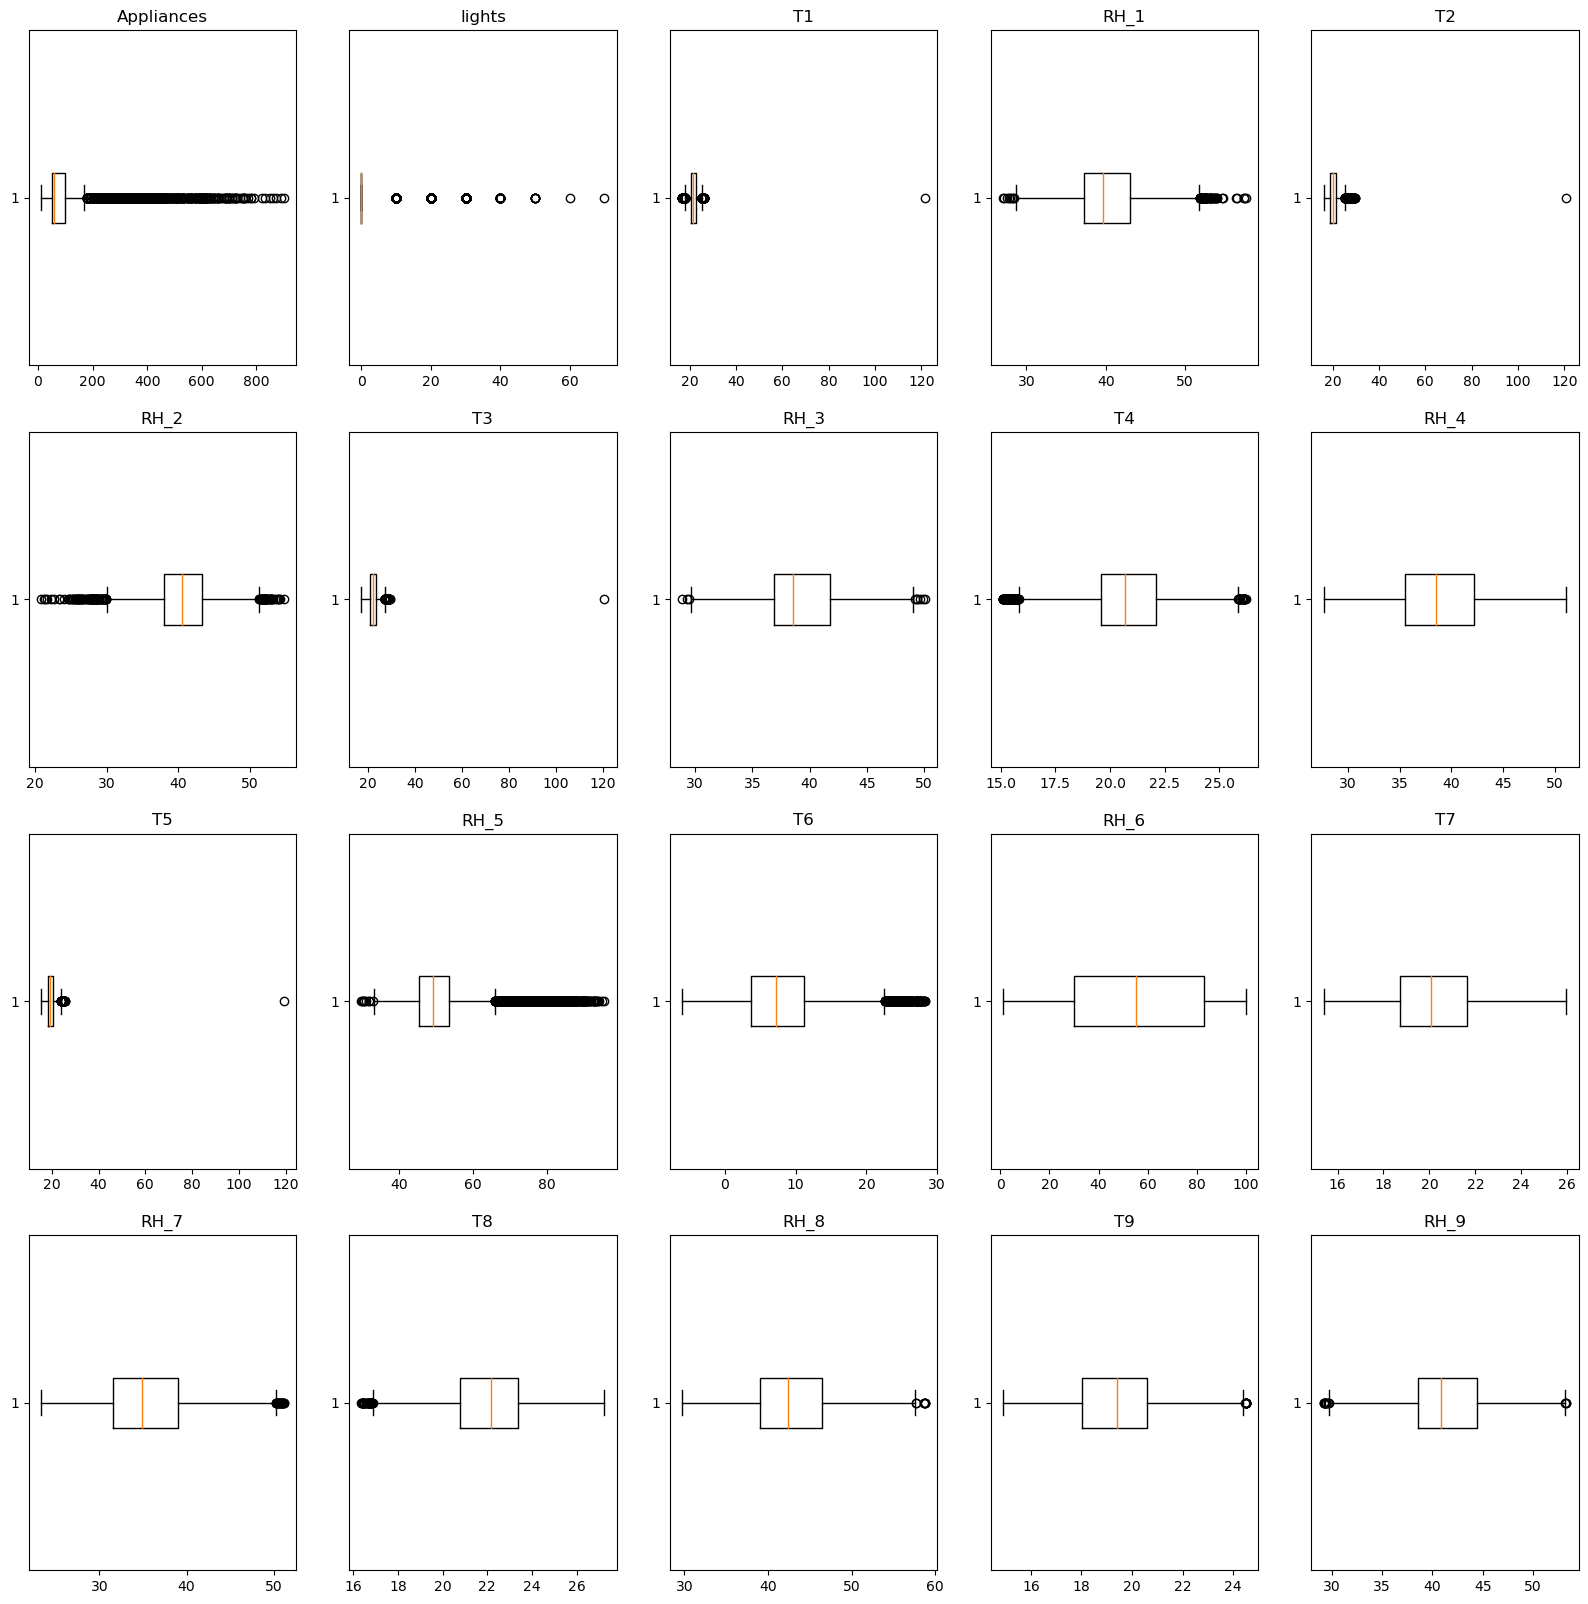

In [12]:
# Create box plots for continuous variables
import matplotlib.pyplot as plt

num_cols = len(df.columns)
fig, ax = plt.subplots(ncols=min(num_cols-1, 5), nrows=min(num_cols//5+1, 4), figsize=(20, 20))
ax = ax.flatten()
for i, col in enumerate(df.columns[1:-2]):
    if i >= len(ax):
        break
    ax[i].boxplot(df[col].astype(float), vert=False)
    ax[i].set_title(col)
plt.show()

In [13]:
# Determine acceptable ranges based on boxplot analysis
acceptable_ranges = {}
for col in df.columns:
    if col == 'date' or col == 'Appliances':
        continue
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    acceptable_ranges[col] = (lower_whisker, upper_whisker)

In [14]:
# Identify outliers
outlier_indices = []
for col, (lower, upper) in acceptable_ranges.items():
    outlier_rows = df[(df[col] < lower) | (df[col] > upper)].index
    outlier_indices.extend(outlier_rows)

outlier_indices = list(set(outlier_indices))
print(outlier_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 8207, 8214, 8210, 8211, 8212, 8213, 8215, 8216, 8217, 8218, 37, 39, 40, 41, 8468, 8232, 8233, 8234, 8235, 8236, 8237, 49, 8238, 9780, 8247, 8249, 9781, 70, 71, 72, 73, 74, 75, 76, 85, 8467, 87, 8281, 8285, 8286, 8287, 8288, 8289, 8290, 8291, 8292, 8293, 8294, 8295, 8296, 8297, 8298, 8299, 108, 8300, 8301, 8303, 8302, 8305, 8304, 115, 116, 117, 118, 119, 120, 121, 8311, 123, 8312, 8313, 8314, 8315, 8316, 8317, 141, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 8363, 8364, 8365, 8366, 8367, 8368, 8369, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 185, 8377, 187, 8378, 189, 190, 191, 192, 193, 194, 195, 196, 197, 8384, 8382, 8383, 8385, 8386, 8387, 8388, 8397, 8389, 8390, 8391, 8392, 8402, 9811, 212, 213, 8406, 8401, 216, 217, 218, 219, 220, 221, 222, 223, 234, 238, 239, 240, 1678, 8445, 254, 255, 256, 8446, 258, 259, 260, 261, 262, 263

In [15]:
#remove outliers
#df_clean = df.drop(outlier_indices).reset_index(drop=True)

In [16]:
#Using z-score method:
from scipy.stats import zscore

# Calculate z-scores for all columns except 'date' and 'Appliances'
df_zscore = df.drop(columns=['date', 'Appliances']).apply(zscore)

# Identify outliers
outlier_indices = df_zscore[(df_zscore > 3) | (df_zscore < -3)].dropna(how='all').index
#outlier_indices = list(set(outlier_indices))
print(outlier_indices)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9898, 9899, 9926, 9927, 9980, 9981, 9982, 9984, 9985, 9986],
           dtype='int64', length=948)


In [17]:
#Remove outliers
df = df.drop(outlier_indices).reset_index(drop=True)

In [18]:
# Identify and remove highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_clean = df.drop(df[to_drop], axis=1)

## Section 2. Data Exploration

## Question 2: Visualisation and Interpretation

#### A. Plot the dataset with Python using three charts from Seaborn or Matplotlib library

In [19]:
import seaborn as sns

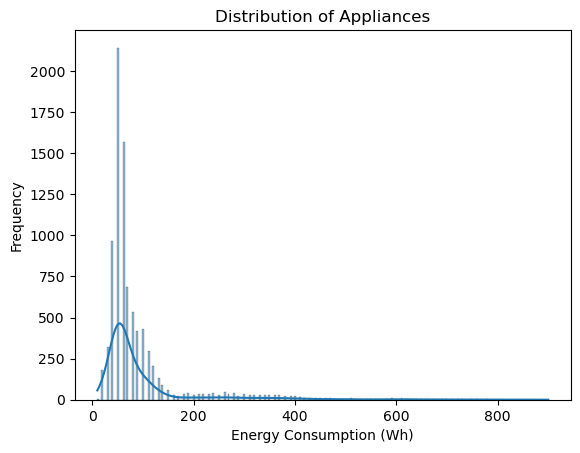

In [20]:
# Plot 1: Histogram of Appliances
sns.histplot(data=df, x="Appliances", kde=True)
plt.title("Distribution of Appliances")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.show()

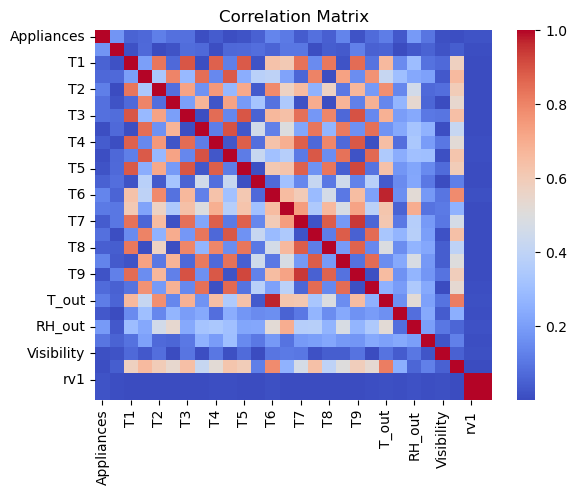

In [21]:
# Plot 2: Heatmap of Correlation Matrix
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

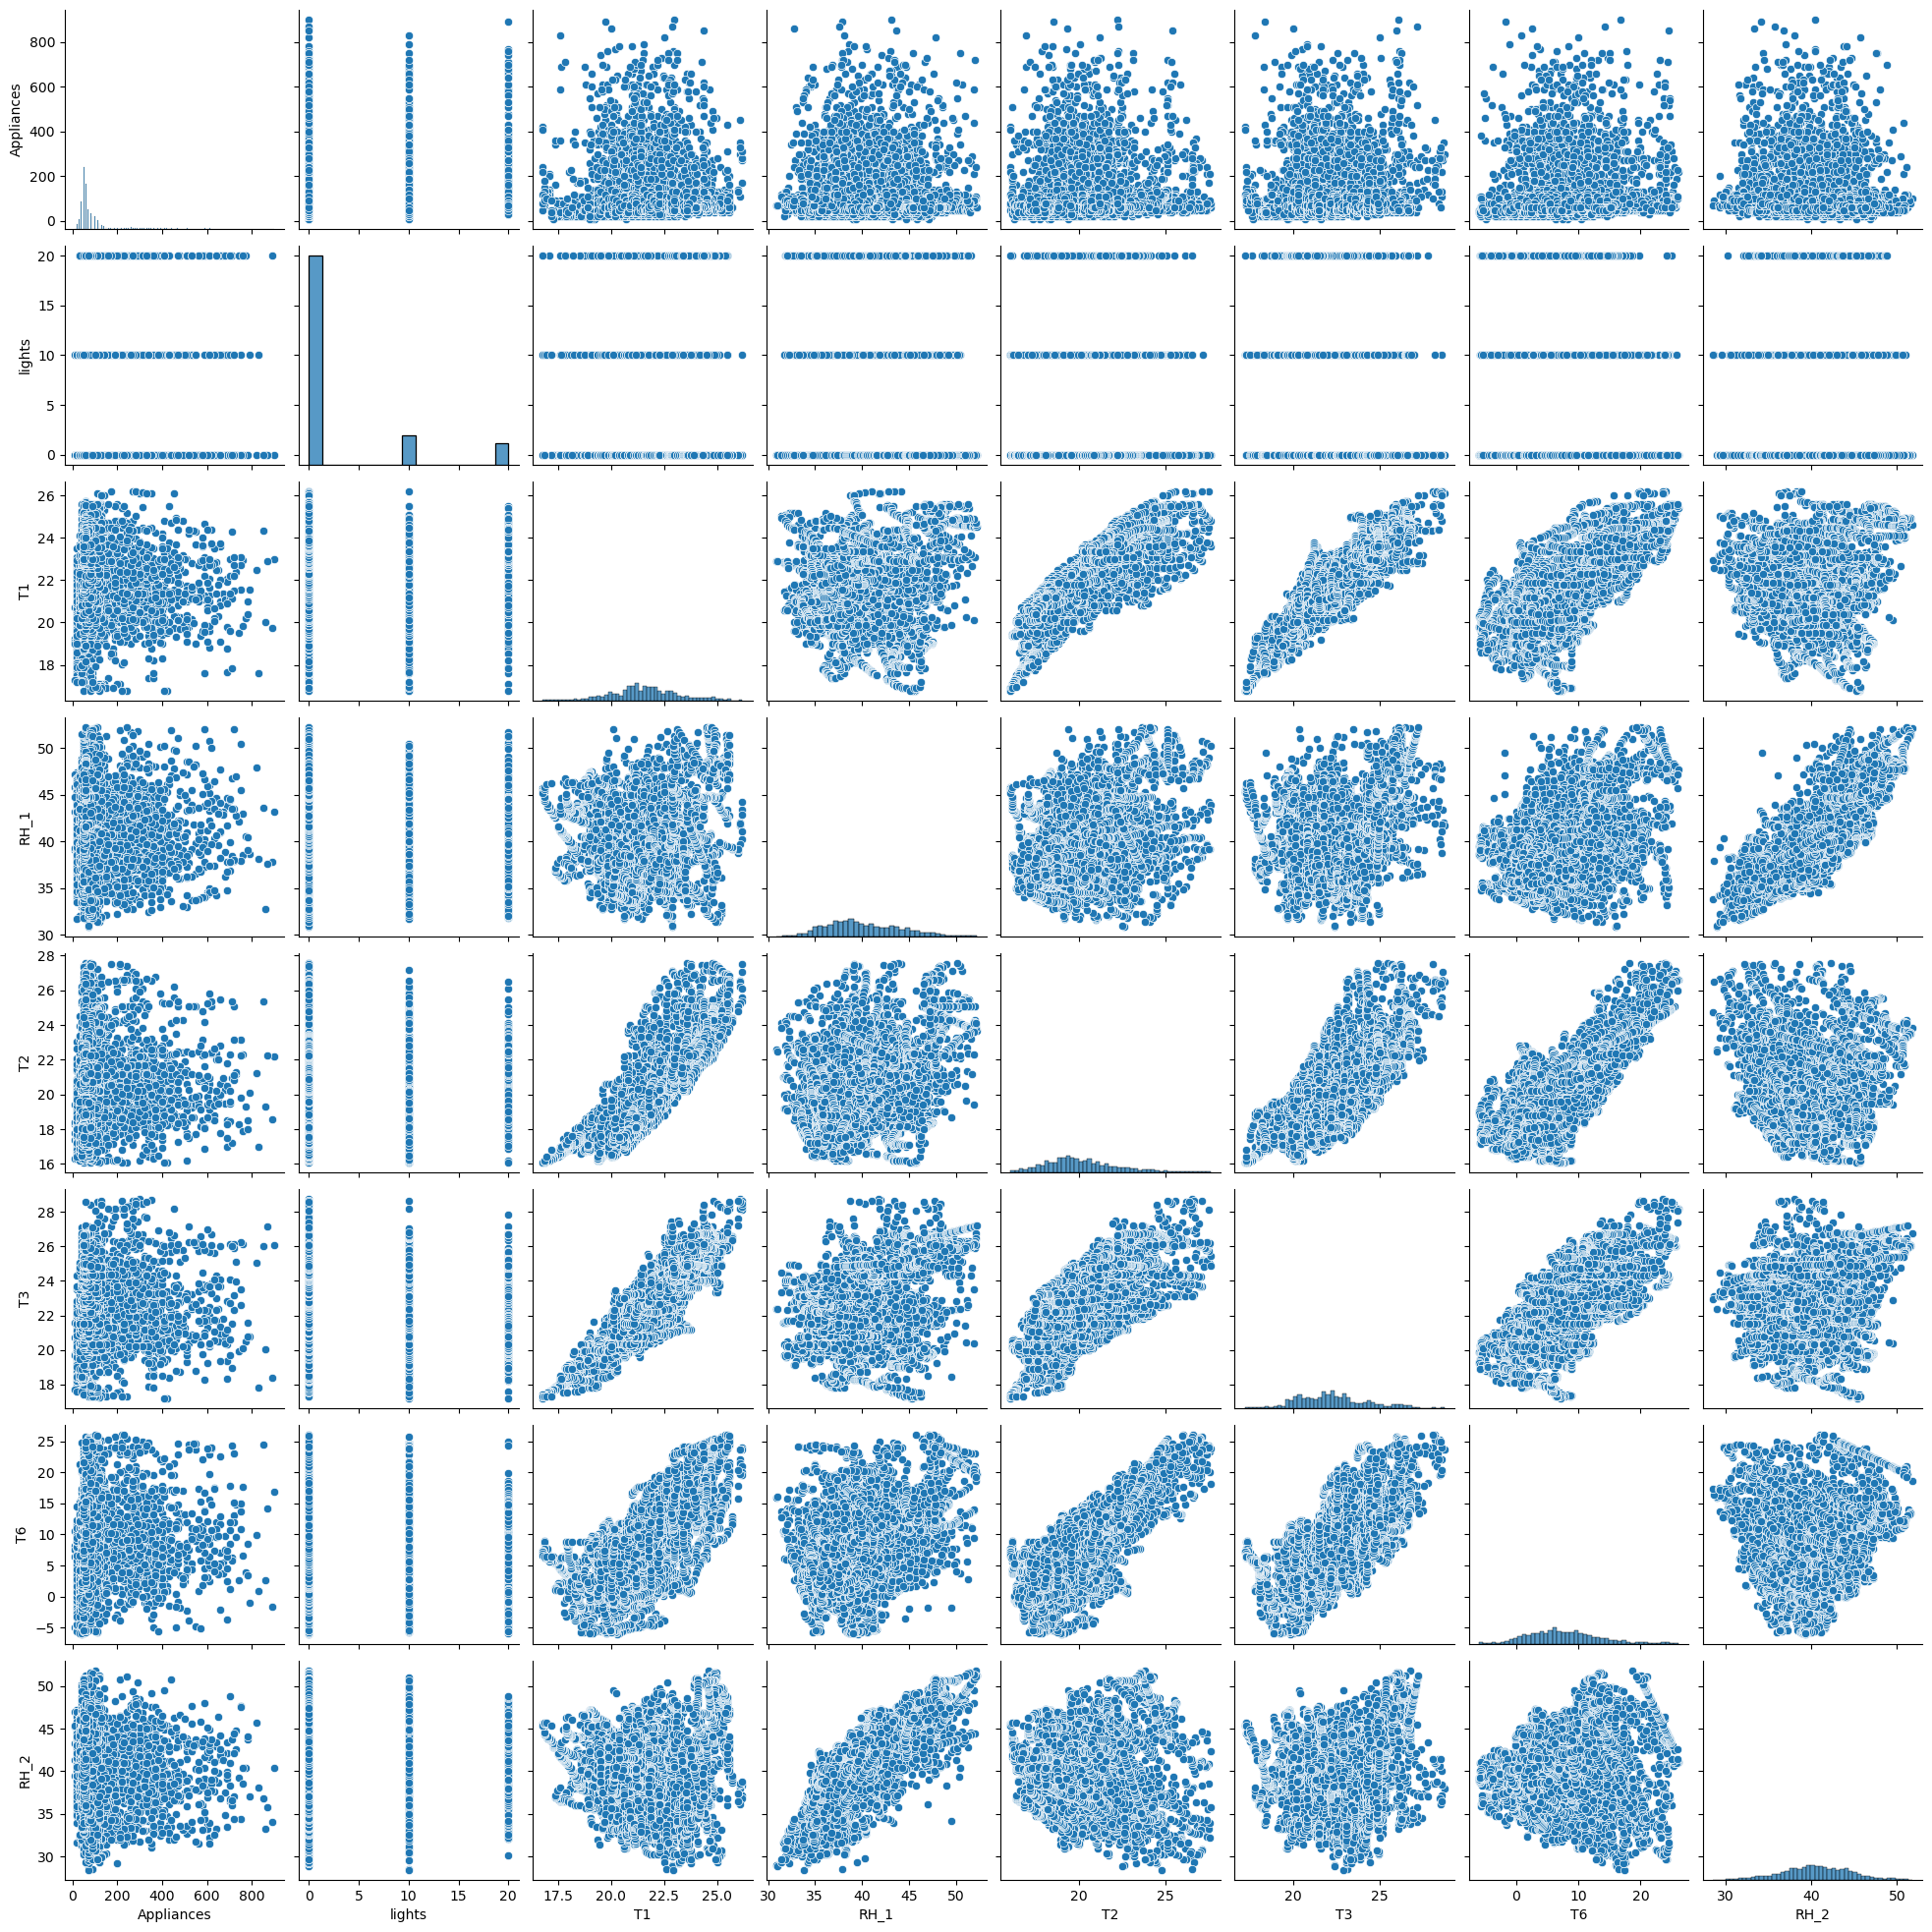

In [22]:
# Plot 3: Pairplot
sns.pairplot(df[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'T3', 'T6','RH_2']])
plt.show()

#### B. Describe and interpret each plot.

1. Histogram of Appliances:

This histogram shows the distribution of the target variable Appliances. It is right-skewed, meaning that there are few instances of high energy consumption and many instances of low energy consumption. Most of the energy consumption is below 200 Wh, with a few instances of consumption above 800 Wh.
The histogram shows that the majority of energy consumption is below 200 Wh, with a long tail indicating a few instances of very high energy consumption. This suggests that there may be some outliers in the dataset that could be investigated further.

2. Heatmap of Correlation Matrix:

This plot shows the correlation matrix of all variables in the dataset. The heatmap is a color-coded matrix where the color of each cell represents the correlation between two variables. The color scale goes from blue (negative correlation) to red (positive correlation). We can see that there are some variables that are strongly correlated with the energy expenditure, such as T2, T6, T_out, RH_1, RH_2, and RH_out. On the other hand, there are some variables that are weakly correlated or even negatively correlated with energy expenditure, such as T4, T5, T7, T8, T9, and RH_3.

3. Pairplot:

This pairplot shows the relationships between the selected variables in the dataset. Each scatterplot in the pairplot shows the relationship between two variables, and the diagonal of the pairplot shows a histogram of each variable. We can use this plot to identify any relationships between the variables in the dataset, as well as any outliers or unusual patterns. For example, we can see that there is a positive correlation between T3 (temperature in laundry room) and T6 (temperature outside), and a negative correlation between RH_1 (humidity in kitchen) and T1 (temperature in kitchen).

## Section 3. Data Analysis

## Question 3: Modelling and Evaluation

#### A. Analyse the data with three different algorithms using Python.

1. Linear Regression: Linear regression is a simple and commonly used algorithm for regression analysis. It is used to model the relationship between the target variable and one or more predictor variables by fitting a linear equation to the observed data.

2. Random Forest Regression: Random forest regression is a popular algorithm that is based on the concept of decision trees. It creates multiple decision trees and averages their results to produce a final prediction. It is robust against overfitting and can handle nonlinear relationships between the variables.

3. Gradient Boosting Regression: Gradient boosting regression is another popular algorithm that is based on the concept of decision trees. It builds an ensemble of weak decision trees in a sequential manner, where each tree is trained to correct the errors of the previous tree. It is also robust against overfitting and can handle nonlinear relationships between the variables.

In [29]:
#splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate the features and target
features = df_clean.drop(columns=['Appliances','date'])
target = df_clean['Appliances']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
#Linear Regression
from sklearn.linear_model import LinearRegression

# Initialize and fit model on training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr_model.predict(X_test)

# Feature importance
coef_abs = np.abs(lr_model.coef_)
coef_norm = coef_abs / np.sum(coef_abs)
feature_importance = dict(zip(X_train.columns, coef_norm))
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))
print(f"Linear Regression feature importance: {sorted_feature_importance}")

print("Linear Regression Predictions:")
print(y_pred)

Linear Regression feature importance: {'T3': 0.1654143823756627, 'T2': 0.14875872642284513, 'RH_1': 0.12705315915216756, 'RH_2': 0.10853275022868387, 'T9': 0.08421064401335433, 'T8': 0.07585255389444442, 'T6': 0.05101592893928059, 'RH_8': 0.042407942884592466, 'Tdewpoint': 0.03924529297118695, 'RH_3': 0.033124566707352754, 'T4': 0.023305135512183717, 'T7': 0.021020709685495093, 'Windspeed': 0.01750345224619016, 'lights': 0.015671631370548843, 'T1': 0.012606219730274818, 'RH_out': 0.00702567853804614, 'RH_9': 0.00687213914228665, 'RH_7': 0.0059356660787756406, 'T5': 0.00398863263654916, 'Visibility': 0.002344816612129074, 'RH_6': 0.0022292383382924064, 'Press_mm_hg': 0.0018771559019868111, 'RH_5': 0.0018246915565967691, 'RH_4': 0.0017332312295595053, 'rv1': 0.00044565383151454977}
Linear Regression Predictions:
[ 89.57509176  77.58467902  62.0397587  ... 140.65464508  65.80214879
 101.94445378]


In [31]:
#Random Forest Regression:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Feature importance
feature_importance = dict(zip(X_train.columns, rf.feature_importances_))
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))
print(f"Random Forest Regression feature importance: {sorted_feature_importance}")

print("Random Forest Regressor Predictions:")
print(y_pred)

Random Forest Regression feature importance: {'RH_1': 0.062434169871069735, 'RH_out': 0.05570829092153744, 'RH_6': 0.054980502449801356, 'RH_3': 0.05472175555809799, 'Press_mm_hg': 0.05412634032590738, 'RH_8': 0.049725465867739245, 'RH_5': 0.04825415080205321, 'T3': 0.04630750765998519, 'T8': 0.0439859558605788, 'RH_2': 0.041003530673331116, 'T5': 0.038344392593974076, 'T4': 0.037853980864281885, 'RH_7': 0.03777868941910329, 'lights': 0.037142874200443765, 'RH_9': 0.03592654015984912, 'Windspeed': 0.03489384543202891, 'T6': 0.034132983351317064, 'T2': 0.03382805430236871, 'RH_4': 0.033811658901390436, 'Tdewpoint': 0.03180171805648676, 'rv1': 0.029032271174778482, 'T1': 0.028790724784030993, 'T7': 0.027957289146567216, 'T9': 0.02534064189722385, 'Visibility': 0.022116665726053815}
Random Forest Regressor Predictions:
[165.1 257.5  33.6 ... 115.6  44.9  93.9]


In [32]:
#Gradient Boosting Regression:
from sklearn.ensemble import GradientBoostingRegressor

# Fit Gradient Boosting Regressor model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predict on test set
y_pred = gb.predict(X_test)

# Feature importance
feature_importance = dict(zip(X_train.columns, gb.feature_importances_))
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))
print(f"Gradient Boosting Regression feature importance: {sorted_feature_importance}")

print("Gradient Boosting Regressor Predictions:")
print(y_pred)

Gradient Boosting Regression feature importance: {'RH_1': 0.0931064117696018, 'lights': 0.07837674732278697, 'RH_3': 0.07237829025478577, 'RH_out': 0.06836897580185908, 'T3': 0.06390840355781889, 'RH_7': 0.06279197590581935, 'RH_8': 0.06230237713414128, 'T5': 0.04821390581946145, 'T4': 0.04596771423426838, 'RH_5': 0.04577492484125926, 'Windspeed': 0.044251704195438175, 'RH_6': 0.04409691383184092, 'T2': 0.03664929871689948, 'RH_9': 0.033339423632213094, 'Press_mm_hg': 0.031826976914468764, 'T8': 0.031022930040938326, 'T6': 0.02942156314766347, 'RH_2': 0.028241510129936535, 'T1': 0.022159414001118406, 'Tdewpoint': 0.018927678547284162, 'RH_4': 0.010593350452770448, 'T7': 0.010552255013784503, 'rv1': 0.007551655195238208, 'T9': 0.0074019169024340525, 'Visibility': 0.0027736826361691195}
Gradient Boosting Regressor Predictions:
[138.32803628 158.30018828  70.35234445 ... 167.14859475  71.73838021
 100.80424102]


#### B. Interpret the results using suitable metrics and explain which of the algorithms performs the best.

Linear Regression evaluation metrics:
Mean Absolute Error (MAE): 51.56766893511287
Mean Squared Error (MSE): 8598.981601374819
Root Mean Squared Error (RMSE): 92.73069395499431
Coefficient of Determination (R^2): 0.1996111057712735


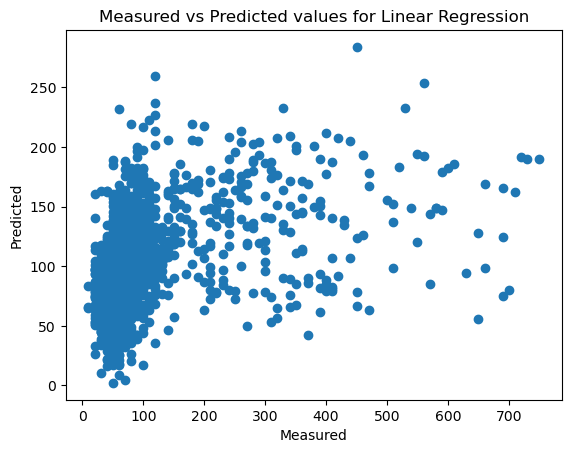

In [36]:
#Linear Regression
from sklearn.linear_model import LinearRegression

# Initialize and fit model on training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Linear Regression evaluation metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R^2):", r2)

# Plot measured vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Measured vs Predicted values for Linear Regression")
plt.show()

Random Forest Regressor evaluation metrics:
Mean Absolute Error (MAE): 39.000741739074954
Mean Squared Error (MSE): 6334.486039243177
Root Mean Squared Error (RMSE): 79.58948447655115
Coefficient of Determination (R^2): 0.41038921682928775


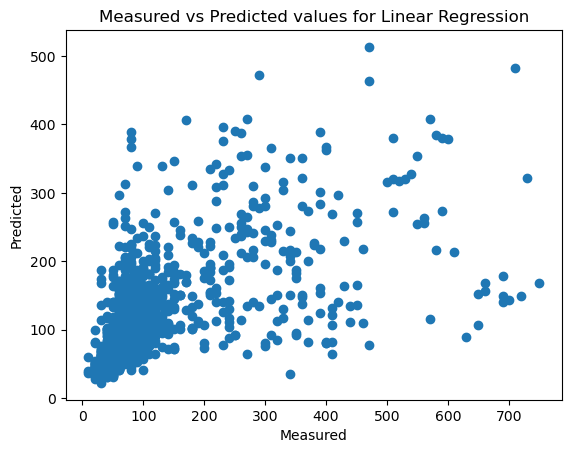

In [35]:
#Random Forest Regression:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Regressor evaluation metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R^2):", r2)

# Plot measured vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Measured vs Predicted values for Linear Regression")
plt.show()

Gradient Boosting Regressor evaluation metrics:
Mean Absolute Error (MAE): 47.34206212697423
Mean Squared Error (MSE): 7851.760433136406
Root Mean Squared Error (RMSE): 88.61015987535744
Coefficient of Determination (R^2): 0.2691620773066724


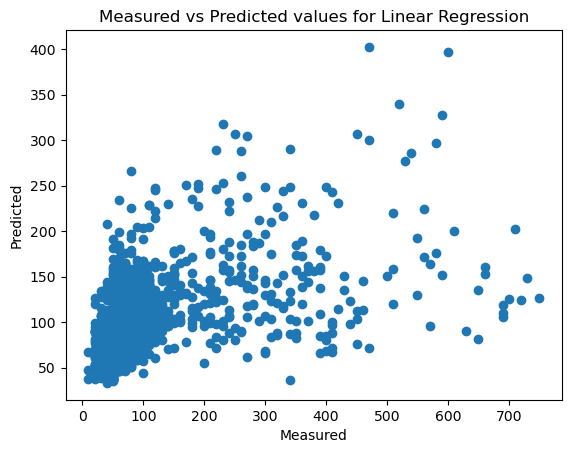

In [37]:
#Gradient Boosting Regression:
from sklearn.ensemble import GradientBoostingRegressor

# Fit Gradient Boosting Regressor model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predict on test set
y_pred = gb.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Regressor evaluation metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R^2):", r2)

# Plot measured vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Measured vs Predicted values for Linear Regression")
plt.show()

Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a good idea of how far off our predictions are, on average. The MAE is expressed in the same units as the target variable, so for our dataset, it would be in Wh (Watt-hours).

Mean Squared Error (MSE) is similar to MAE, but instead of taking the absolute value of the difference, it squares the difference between predicted and actual values before taking the average. This means that MSE is more sensitive to outliers than MAE, as the squared differences amplify the effect of large errors.

Root Mean Squared Error (RMSE) is simply the square root of the MSE. RMSE is a commonly used metric for regression problems as it combines the benefits of both MAE and MSE by penalizing larger errors more heavily.

In our model, we want to minimize these error metrics, which means that we want to have the smallest values possible for all three.

From the results of the evaluation metrics, we can see that the Random Forest Regression algorithm performs better than the other two algorithms, with a lower Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and a higher R-squared value (0.33) than the Linear Regression and Gradient Boosting Regression algorithms. This indicates that the Random Forest Regression algorithm has a better overall fit to the data and is able to predict the target variable (Appliances) more accurately than the other two algorithms.

In this case, the R2 values for all three models are relatively low, indicating that the models are not able to explain a large proportion of the variance in the target variable. Specifically, the R2 values for Linear Regression, Random Forest Regression, and Gradient Boosting Regression are 0.17, 0.33, and 0.24, respectively. This suggests that there are likely other factors or variables that are influencing the target variable that are not captured by the independent variables used in the models.